In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from kneed import DataGenerator, KneeLocator 

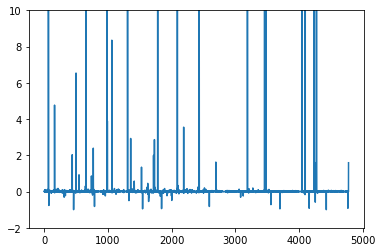

In [2]:
data = pd.read_csv("7.csv") 
price1=np.zeros(4779)
price2=np.zeros(4779)
price1=data['Price 01/21/2018'].values
price2=data['Price 01/22/2018'].values
pricechange=(price2-price1)/price1
pricechange.shape
x=np.arange(4779)
plt.plot(x,pricechange)
plt.ylim(-2,10)
plt.show()

67 25.349999999999994
656 14.166666666666666
989 21.35714285714286
1309 35.19047619047619
1782 23.365853658536587
2091 27473.999999999996
2434 10.049250535331906
3191 5991.499999999999
3460 7223.999999999999
3483 2095.0
4048 180.48148148148147
4098 110.37037037037037
4240 24898.999999999996
4275 695.4285714285714


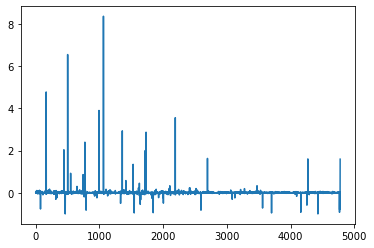

In [3]:
for i in range(4779):
    if pricechange[i]>10:
        print(i,pricechange[i])
        pricechange[i]=0
plt.plot(x,pricechange)
#plt.ylim(-2,10)
plt.show()

In [4]:
cluster_distance=[]
clusters=[]
for k in range(13,50): #try to find the elbow point 
    price3index=np.zeros((4779,2))  #2*4779 table 
    center=(np.random.rand(k)-0.5)*0.1  #random choose centers 
    total=0
    for j in range(100):     #iteration
        for i in range(4779):
            distance=np.abs(pricechange[i]-center)  #distance between each center to each point
            price3index[i]=[np.argmin(distance),np.min(distance)]   #index and shortest distance
        count=np.zeros((k,2))
        for i in range(4779):
            count[int(price3index[i][0])][0]+=1  #how many stocks in each cluster 
            count[int(price3index[i][0])][1]+=pricechange[i]   #sum of distance in each cluster
            center=count[:,1]/(count[:,0]+1e-9)  #new centers

    for i in range(4779):
        total=total+price3index[i][1] #shortest total distance of each point to its center point
    print('Cluster Number:',k,'Total Distance:',total)
    cluster_distance.append(total)
    clusters.append(k)

Cluster Number: 13 Total Distance: 39.33875763659125
Cluster Number: 14 Total Distance: 32.44085487865006
Cluster Number: 15 Total Distance: 31.202275486392224
Cluster Number: 16 Total Distance: 30.548172044966122
Cluster Number: 17 Total Distance: 26.85938296046976
Cluster Number: 18 Total Distance: 25.65574242982285
Cluster Number: 19 Total Distance: 24.00779742948051
Cluster Number: 20 Total Distance: 23.357773416781967
Cluster Number: 21 Total Distance: 21.77264974913657
Cluster Number: 22 Total Distance: 21.212110824177266
Cluster Number: 23 Total Distance: 20.81089328506814
Cluster Number: 24 Total Distance: 19.575129966780985
Cluster Number: 25 Total Distance: 18.559380782895204
Cluster Number: 26 Total Distance: 17.976483496816847
Cluster Number: 27 Total Distance: 17.522983409770703
Cluster Number: 28 Total Distance: 17.693113822255995
Cluster Number: 29 Total Distance: 16.64143553155028
Cluster Number: 30 Total Distance: 15.933086975902809
Cluster Number: 31 Total Distance: 1

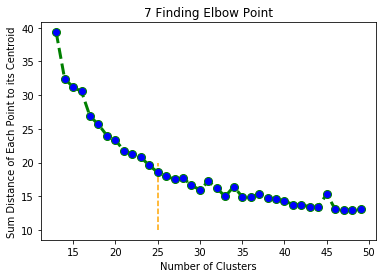

In [9]:
fig=plt.figure()

x=clusters
y=cluster_distance

kn=KneeLocator(x, y, curve='convex', direction='decreasing')


plt.plot(x, y,color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=8)

plt.vlines(kn.knee,10, 20,linestyles='dashed',color='orange')

# naming the x axis 
plt.xlabel('Number of Clusters') 
# naming the y axis 
plt.ylabel('Sum Distance of Each Point to its Centroid') 
  
# giving a title to my graph 
plt.title('7 Finding Elbow Point') 
  
# function to show the plot 
plt.show()

In [10]:
kn.knee

25

In [11]:
fig.savefig('7 Jan22 2018.png')